In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from stock_analysis import StockVisualizer, StockReader, StockAnalyzer
from stock_analysis.utils import group_stocks, make_portfolio

In [2]:
start_date = '2014-01-01'
end_date = '2024-01-01'
reader = StockReader(start_date, end_date)

In [3]:
# get MAANG data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

In [4]:
# get S&P 500 data
sp = reader.get_index_data('S&P 500')

In [16]:
# get Fama French Five Factor Model Data
df = pd.read_csv('famafrench_data/F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows=3)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df.tail()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
15224,2023-12-22,0.21,0.61,0.09,-0.64,0.19,0.021
15225,2023-12-26,0.48,0.81,0.46,-0.34,-0.15,0.021
15226,2023-12-27,0.16,0.16,0.12,-0.31,-0.14,0.021
15227,2023-12-28,-0.01,-0.38,0.03,-0.32,0.15,0.021
15228,2023-12-29,-0.43,-1.13,-0.37,0.67,-0.07,0.021


In [6]:
faang = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog
    }
)

faang_portfolio = make_portfolio(faang)
faang_portfolio.tail()

,adj_close,close,high,low,name,open,volume
date,,,,,,,
2023-12-22,142.720001,142.720001,143.250000,142.054993,Google,142.130005,18494700
2023-12-26,142.820007,142.820007,143.945007,142.500000,Google,142.979996,11170100
2023-12-27,141.440002,141.440002,143.320007,141.050995,Google,142.830002,17288400
2023-12-28,141.279999,141.279999,142.270004,140.828003,Google,141.850006,12192500
2023-12-29,140.929993,140.929993,141.434998,139.899994,Google,140.679993,14872700


In [30]:
## todo: need to find a suitable rf (use ff maybe)
rf = 0.021  # placeholder for risk-free rate

# examine portfolio returns
faang_analyzer = StockAnalyzer(faang_portfolio)

# CAPM alpha and beta
falpha = faang_analyzer.alpha(sp, rf)
fbeta = faang_analyzer.beta(sp)

print("Alpha (last 10 years): ", falpha)
print("Beta (last 10 years): ", fbeta)

Alpha (last 10 years):  4.736490932174565
Beta (last 10 years):  1.1780521778822866


/Users/joshzheng/Documents/stock-analysis/stock_analysis/stock_analyzer.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start, end = df.close[0], df.close[-1]


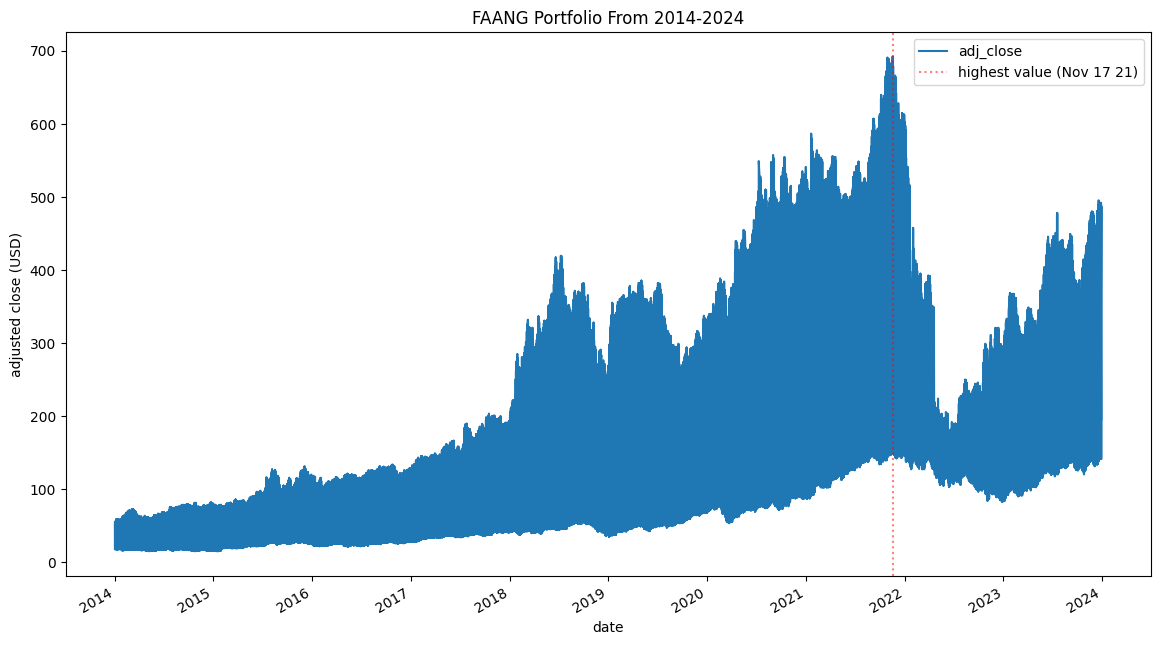

In [8]:
faang_visualizer = StockVisualizer(faang)

fx = faang_visualizer.evolution_over_time(
    'adj_close',
    figsize = (14, 8),
    legend = True,
    title = 'FAANG Portfolio From 2014-2024'
)

faang_visualizer.add_reference_line( 
    fx,
    x = faang_portfolio.high.idxmax(),
    color = 'red',
    linestyle = ':',
    label=f'highest value ({faang.high.idxmax():%b %d %y})',
    alpha = 0.5
)

fx.set_ylabel('adjusted close (USD)')
plt.show()